In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from sentence_transformers import SentenceTransformer
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

x:\Kuliah\Semester 8\Sandbox\myenv2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("../../Data preprocessing/Preprocessed data V2/arxiv_eess_preprocessed.csv")
abstracts = df["summary"].to_list()
dates = df["date"].to_list()
ids = df["id"].to_list()

In [3]:
embedding_model = SentenceTransformer("all-mpnet-base-v2")
embeddings = np.load("../../Topic extraction/abstract embeddings/all-mpnet-base-v2-embeddings V2/eess_embeddingsV2.npy")
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1,2))
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

In [10]:
umap_model = UMAP(n_neighbors=15, 
                  n_components=15,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=42)

In [5]:
hdbscan_model = HDBSCAN(min_cluster_size=50,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

In [11]:
topic_model = BERTopic(
    
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  ctfidf_model=ctfidf_model,

  n_gram_range=(1,2),
  top_n_words=10,
  nr_topics="auto"
)

# Train model
topics, probs = topic_model.fit_transform(abstracts, embeddings)

# Show topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,5155,-1_model_data_learning_method,"[model, data, learning, method, image, based, ...","[['advancement', 'imaging', 'device', 'countle..."
1,0,4380,0_speech_model_control_problem,"[speech, model, control, problem, audio, state...","[['recently', 'conformer', 'backbone', 'networ..."
2,1,2439,1_channel_ri_communication_wireless,"[channel, ri, communication, wireless, antenna...","[['reconfigurable', 'intelligent', 'surface', ..."
3,2,1132,2_segmentation_image_medical_cancer,"[segmentation, image, medical, cancer, ct, tum...","[['medical', 'image', 'analysis', 'hot', 'rese..."
4,3,898,3_power_energy_grid_voltage,"[power, energy, grid, voltage, load, renewable...","[['paper', 'multi', 'stage', 'model', 'expansi..."
5,4,445,4_vehicle_traffic_driving_road,"[vehicle, traffic, driving, road, autonomous, ...","[['connected', 'autonomous', 'vehicle', 'cavs'..."
6,5,415,5_robot_robotic_control_motion,"[robot, robotic, control, motion, gait, roboti...","[['enable', 'safe', 'effective', 'human', 'rob..."
7,6,304,6_sar_lidar_imagery_synthetic aperture,"[sar, lidar, imagery, synthetic aperture, crop...","[['paper', 'introduce', 'innovative', 'super',..."
8,7,235,7_music_musical_melody_dance,"[music, musical, melody, dance, instrument, mu...","[['task', 'music', 'driven', 'dance', 'generat..."
9,8,229,8_uav_uavs_aerial_drone,"[uav, uavs, aerial, drone, unmanned, aerial ve...","[['due', 'high', 'mobility', 'easy', 'deployme..."


In [12]:
new_topics = topic_model.reduce_outliers(abstracts, topics, strategy="c-tf-idf")
topic_model.update_topics(abstracts, topics=new_topics)
topic_model.get_topic_info()

2024-10-22 07:53:30,152 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1,-1_redacted arxiv_redacted_arxiv_,"[redacted arxiv, redacted, arxiv, , , , , , , ]","[['advancement', 'imaging', 'device', 'countle..."
1,0,5912,0_model_speech_system_method,"[model, speech, system, method, based, data, a...","[['recently', 'conformer', 'backbone', 'networ..."
2,1,3050,1_channel_communication_ri_system,"[channel, communication, ri, system, proposed,...","[['reconfigurable', 'intelligent', 'surface', ..."
3,2,1874,2_image_segmentation_model_medical,"[image, segmentation, model, medical, method, ...","[['medical', 'image', 'analysis', 'hot', 'rese..."
4,3,1145,3_power_energy_system_grid,"[power, energy, system, grid, model, load, vol...","[['paper', 'multi', 'stage', 'model', 'expansi..."
5,4,552,4_vehicle_traffic_control_driving,"[vehicle, traffic, control, driving, autonomou...","[['connected', 'autonomous', 'vehicle', 'cavs'..."
6,5,534,5_robot_control_system_motion,"[robot, control, system, motion, robotic, base...","[['enable', 'safe', 'effective', 'human', 'rob..."
7,6,401,6_sar_data_image_model,"[sar, data, image, model, method, learning, ba...","[['paper', 'introduce', 'innovative', 'super',..."
8,7,430,7_music_audio_model_generation,"[music, audio, model, generation, musical, tas...","[['task', 'music', 'driven', 'dance', 'generat..."
9,8,295,8_uav_uavs_aerial_unmanned,"[uav, uavs, aerial, unmanned, aerial vehicle, ...","[['due', 'high', 'mobility', 'easy', 'deployme..."


In [8]:
def calculate_coherence_score(model, abstracts, topics):
    documents = pd.DataFrame({"Abstracts": abstracts, "ID": range(len(abstracts)), "Topic": topics})
    documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Abstracts': ' '.join})

    analyzer = model.vectorizer_model.build_analyzer()
    tokens = [analyzer(doc) for doc in documents_per_topic.Abstracts]

    dictionary = Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]

    topic_words = [[word for word, _ in model.get_topic(topic)] for topic in range(len(set(topics))-1)]

    coherence_model = CoherenceModel(topics=topic_words, texts=tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    
    return coherence

In [24]:
coherence = calculate_coherence_score(topic_model, abstracts, new_topics)
print(coherence)

0.7442859942431529


In [ ]:
with open('eess_topics_over_time.pkl', 'rb') as f:
    topics_over_time = pickle.load(f)

topics_over_time_df = pd.DataFrame(topics_over_time, columns=["Topic", "Timestamp", "Frequency"])

# Convert the 'Timestamp' column to a datetime object for easier grouping
topics_over_time_df['Timestamp'] = pd.to_datetime(topics_over_time_df['Timestamp'])

# Group by month and topic, summing only the 'Frequency' column
monthly_data = topics_over_time_df.groupby([topics_over_time_df['Timestamp'].dt.to_period('M'), 'Topic'])['Frequency'].sum().reset_index()

x:\Kuliah\Semester 8\Sandbox\myenv2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
topic_model.visualize_topics()

In [8]:
topic_labels = {
0:'Systems modeling, control, and optimization',
1:'Wireless communication systems',
2:'Medical imaging and segmentation',
3:'Power systems and energy storage',
4:'Autonomous vehicles and traffic system',
5:'Robotics and control systems',

6:'Synthetic Aperture Radar (SAR) and image processing',
7:'Music generation and audio processing',
8:'Unmanned Aerial Vehicles (UAVs)',
9:'Video compression and image quality',
10:'Cardiac signal processing',

11:'EEG and brain signal processing',
12:'MRI image reconstruction',
13:'Human activity recognition with wearable sensors',
14:'Microscopy and high-resolution imaging',
15:'Retinal image processing',

16:'Hyperspectral imaging',
17:'Underwater modelling and marine exploration',
18:'Low Earth Orbit (LEO) Satellite Networks and Communication Systems',
19:'Flight control and trajectory tracking',
20:'Generative models for image processing'
}

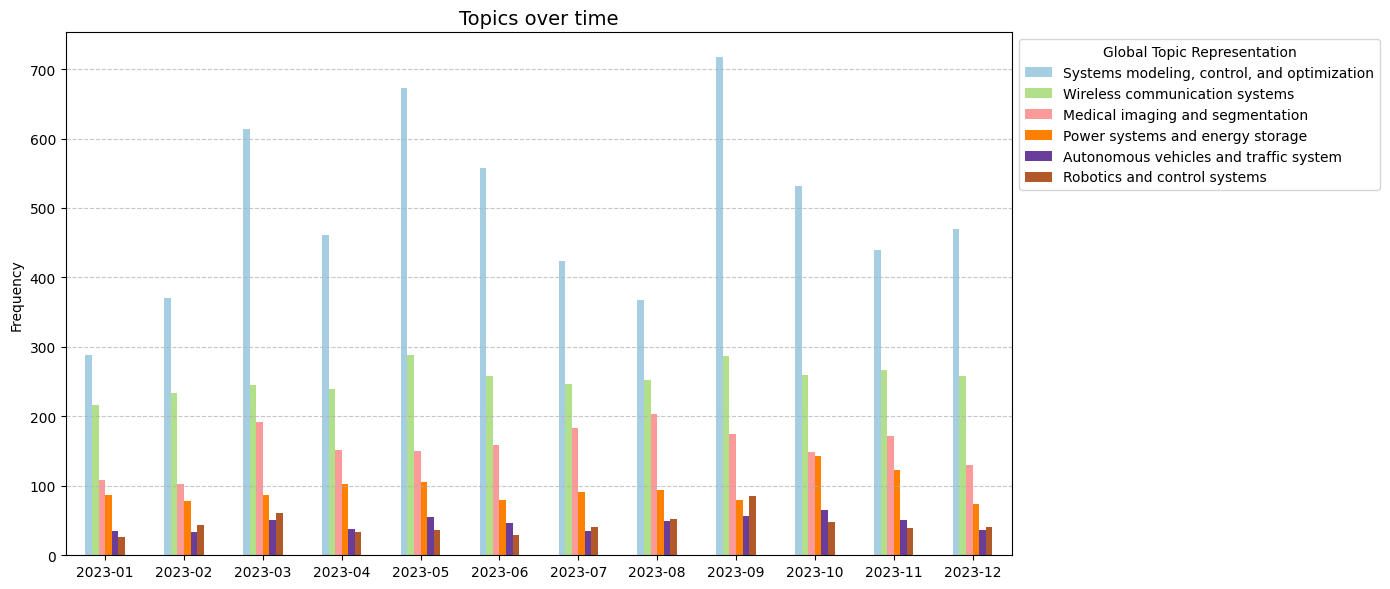

In [18]:
specific_topics = [0,1,2,3,4,5]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

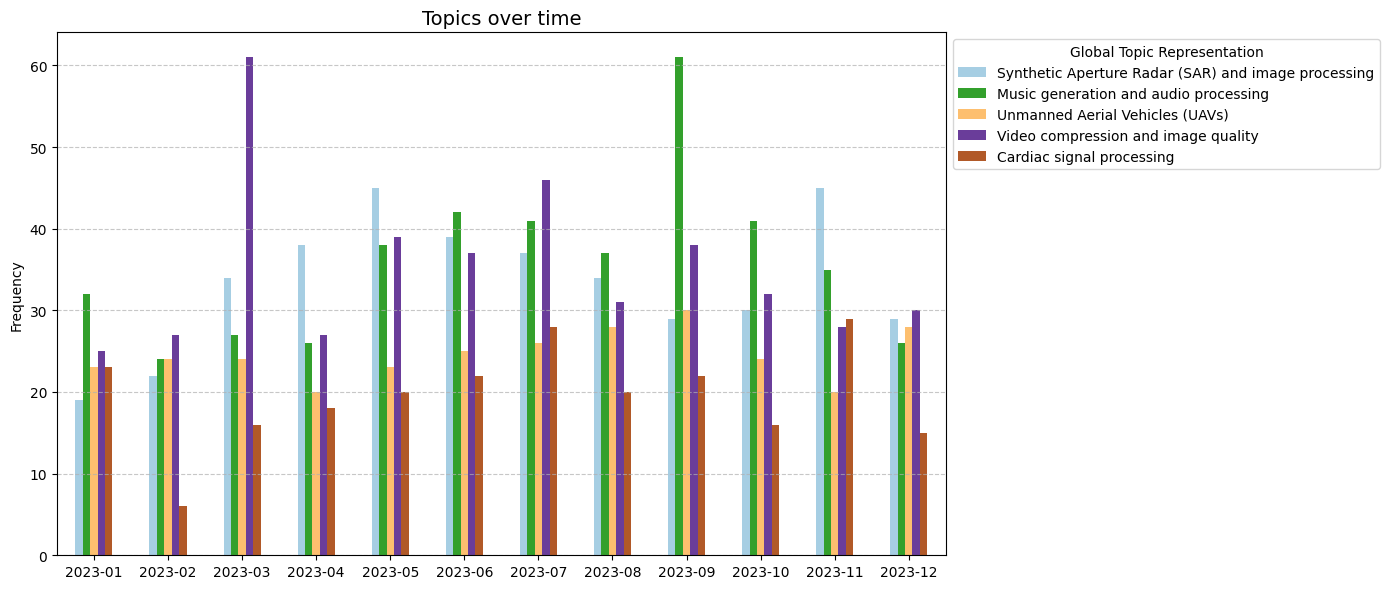

In [15]:
specific_topics = [6,7,8,9,10]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

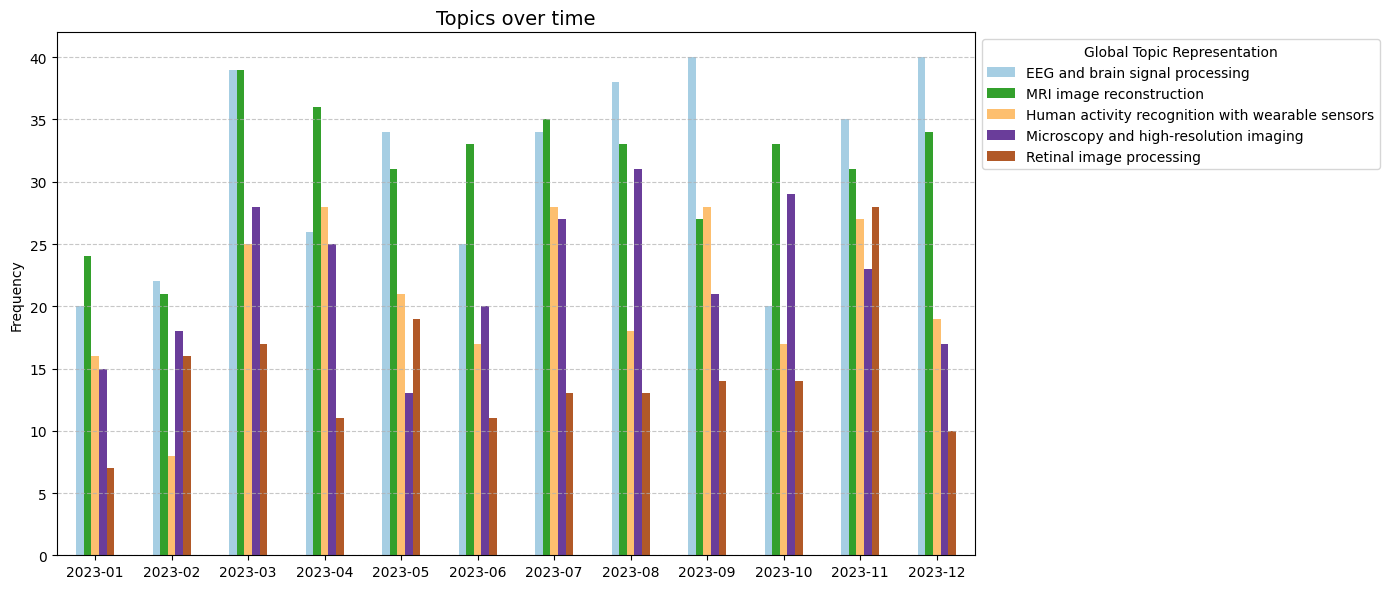

In [14]:
specific_topics = [11,12,13,14,15]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

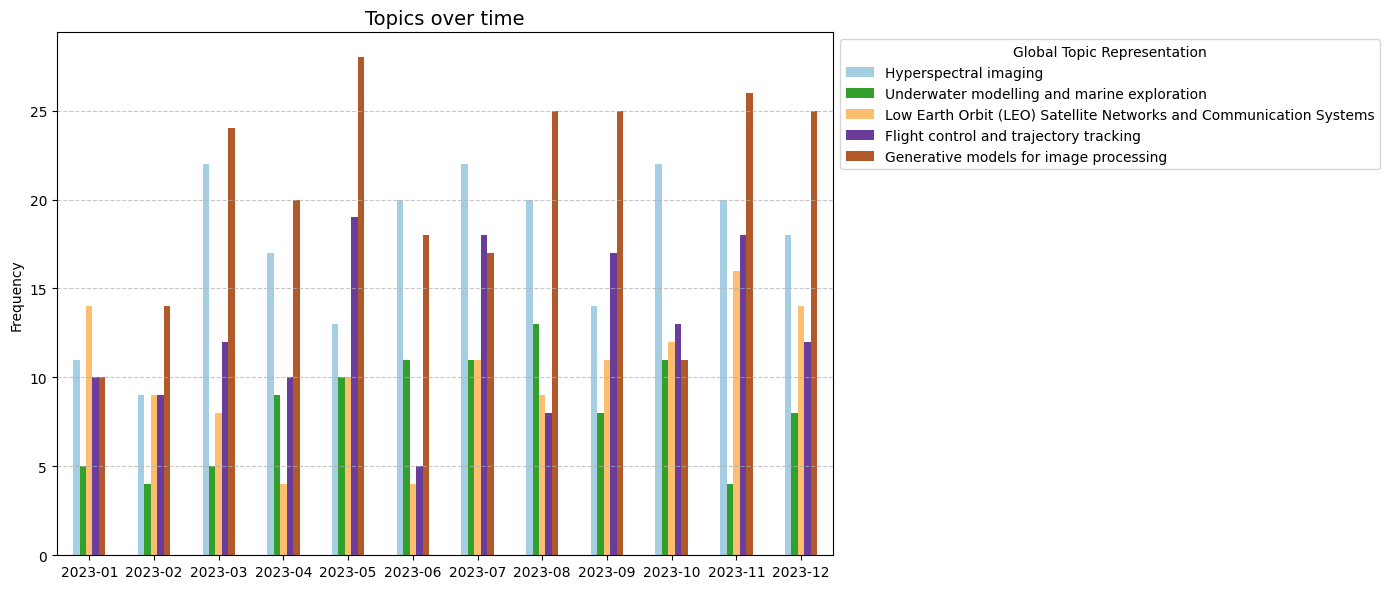

In [13]:
specific_topics = [16,17,18,19,20]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()